## ESA CCI Toolbox Data Access with Parameters

This notebook shows how to open data cubes from the ESA Open Data Portal for a given time range and region:

A **temporarily regular cube** with aggregated CCI data that fall into equal-size time periods;

We start with necessary imports.

In [1]:
from xcube.core.store import new_data_store
import IPython.display
import shapely

Now we can create the store.

In [2]:
cci_store = new_data_store('esa-cci')

For this demo, we are using the dataset with the id 'esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1'. Here is its metadata:

In [3]:
cci_store.describe_data('esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1')

We are focussing on Africa, so we define a bounding box accordingly.

In [4]:
x1 = -23.40  # degree
y1 = -40.40  # degree
x2 = 57.40  # degree
y2 = 40.40  # degree

bbox = (x1, y1, x2, y2)

Visualize the bounding box. If you don't see anything, please refer to [Ex0-DCFS-Setup](./Ex0-DCFS-Setup.ipynb).

In [5]:
IPython.display.GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)

<IPython.display.GeoJSON object>

Our time range covers data from 1997: 1997-01-01 to 1997-12-01

---
Now to open the dataset. You may check its metadata first to make sure that your parameters are valid.

In [6]:
cci_store.get_open_data_params_schema(data_id='esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1', opener_id='dataset:zarr:cciodp')

Select any valid combination from the paramater in *properties* above. The only mandatory parameter is the data_id. If you leave any parameter out, all available values will be considered.

In [7]:
cube = cci_store.open_data('esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1',
                           variable_names=['absorbing_aerosol_index'],
                           bbox=bbox,
                           time_range=['2005-01-01', '2005-12-31'])
cube

<xarray.Dataset> Size: 308kB
Dimensions:                  (time: 12, lat: 80, lon: 80, bnds: 2)
Coordinates:
  * lat                      (lat) float32 320B -39.5 -38.5 -37.5 ... 38.5 39.5
  * lon                      (lon) float32 320B -22.5 -21.5 -20.5 ... 55.5 56.5
  * time                     (time) datetime64[ns] 96B 2005-01-16T12:00:00 .....
    time_bnds                (time, bnds) datetime64[ns] 192B dask.array<chunksize=(12, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    absorbing_aerosol_index  (time, lat, lon) float32 307kB dask.array<chunksize=(1, 80, 80), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-pla...
    date_created:            2025-12-05T16:05:50.977171
    processing_level:        L3
    time_coverage_start:     2005-01-01T00:00:00
    time_coverage_end:       2006-01-01T00:00:00
    time_coverage_duration:  P365DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

We may visualize the cube's time coordinates:

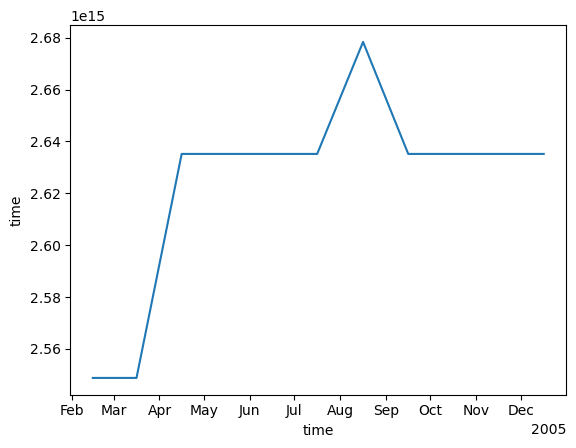

In [8]:
cube.time.diff(dim='time').plot.line()

And finally, display the results:

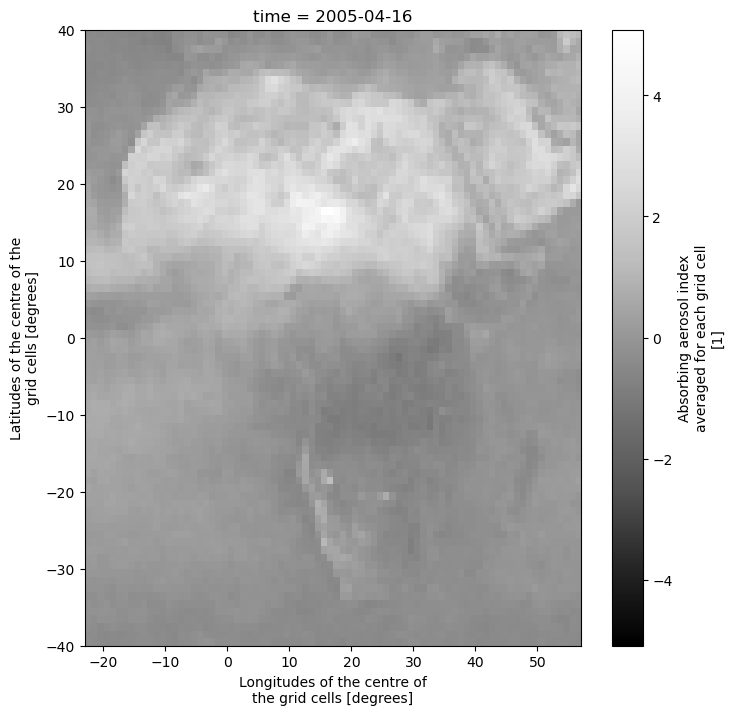

In [9]:
cube.absorbing_aerosol_index.sel(time='2005-04-15 12:00:00', method='nearest').plot.imshow(cmap='Greys_r', figsize=(8, 8))